<h2>Entanglement and Superdense Coding</h2>

[Watch Lecture](https://youtu.be/ZzRcItzUF2U)

Asja has a qubit, initially set to $ \ket{0} $.

Balvis has a qubit, initially set to $ \ket{0} $.

<h3> Entanglement </h3>
    
Asja applies Hadamard operator to her qubit. 

The quantum state of Asja's qubit is $ \stateplus $.

Then, Asja and Balvis combine their qubits. Their quantum state is

$ \stateplus \otimes \vzero = \myvector{ \frac{1}{\sqrt{2}} \\ 0 \\ \frac{1}{\sqrt{2}} \\ 0 }  $.


Asja and Balvis apply CNOT operator on two qubits.

The new quantum state is

$ \CNOT \myvector{ \frac{1}{\sqrt{2}} \\ 0 \\ \frac{1}{\sqrt{2}} \\ 0 }  = \myvector{ \frac{1}{\sqrt{2}} \\ 0 \\0 \\ \frac{1}{\sqrt{2}} } = \frac{1}{\sqrt{2}}\ket{00} + \frac{1}{\sqrt{2}}\ket{11}  $.

At this moment, Asja's and Balvis' qubits are correlated to each other.

If we measure both qubits, we can observe either state $ \ket{00} $ or state $ \ket{11} $. 

Suppose that Asja observes her qubit secretly. 
<ul>
    <li> When Asja sees the result $ \ket{0} $, then Balvis' qubit also collapses to state $ \ket{0} $. Balvis cannot observe state $ \ket{1} $. </li>
    <li> When Asja sees the result $ \ket{1} $, then Balvis' qubit also collapses to state $ \ket{1} $. Balvis cannot observe state $ \ket{0} $. </li>
</ul>
    
Experimental results have confirmed that this happens even if there is a physical distance between Asja's and Balvis' qubits. 

It seems correlated quantum particles can "affect each other" instantly, even if they are in the different part of the universe. 

If two qubits are correlated in this way, then we say that they are <b>entangled</b>.

<i> <u>Technical note</u>: 
    
If the quantum state of two qubits can be written as $ \ket{u} \otimes \ket{v} $, then two qubits are not correlated, where $ \ket{u} $ and $ \ket{v} $ are the quantum states of the first and second qubits.

On the other hand, if the quantum state of two qubits cannot be written as $ \ket{u} \otimes \ket{v} $, then there is an entanglement between the qubits.
</i>

<b> Entangled qubits can be useful </b>

<h3> Quantum communication </h3>

After having the entanglement, Balvis takes his qubit and goes away.

Asja will send two classical bits of information by only sending her qubit.

<img src="../images/superdense_coding.png">

<font size="-2">source: https://fi.m.wikipedia.org/wiki/Tiedosto:Superdense_coding.png </font>

Now, we describe this protocol.

Asja has two bits of classical information: $ a,b \in \{0,1\} $. 

There are four possible values for the pair $ (a,b) $:  $ (0,0), (0,1), (1,0),\mbox{ or } (1,1) $. 

If $a$ is 1, then Asja applies z-gate, i.e., $ Z = \Z $, to her qubit.

If $b$ is 1, then Asja applies x-gate (NOT operator) to her qubit.

Then, Asja sends her qubit to Balvis.

<h3> After the communication </h3>

Balvis has both qubits.

Balvis applies cx-gate (CNOT operator), where Asja's qubit is the controller.

Then, Balvis applies h-gate (Hadamard operator) to Asja's qubit.

Balvis measures both qubits. 

The measurement result will be exactly $ (a,b) $.

<h3> Task 1</h3>

Verify the correctness of the above protocol.

For each pair of $ (a,b) \in \left\{ (0,0), (0,1), (1,0),(1,1) \right\} $:
- Create a quantum curcuit with two qubits: Asja's and Balvis' qubits
- Both are initially set to $ \ket{0} $
- Apply h-gate (Hadamard) to Asja's qubit
- Apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)

Assume that both qubits are separated from each other.

<ul>
    <li> If $ a $ is 1, then apply z-gate to Asja's qubit. </li>
    <li> If $ b $ is 1, then apply x-gate (NOT) to Asja's qubit. </li>
</ul>

Assume that Asja sends her qubit to Balvis.
- Apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
- Apply h-gate (Hadamard) to Asja's qubit
- Measure both qubits and compare the results with pair $ (a,b) $

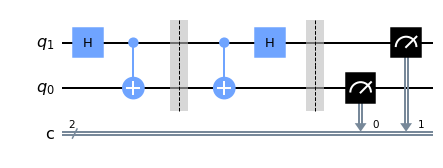

00 --> {'00': 100}


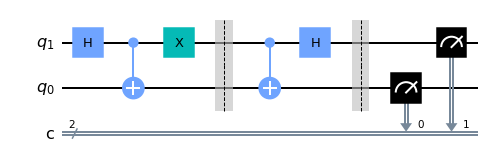

01 --> {'01': 100}


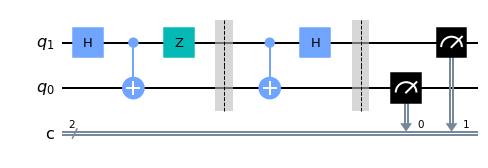

10 --> {'10': 100}


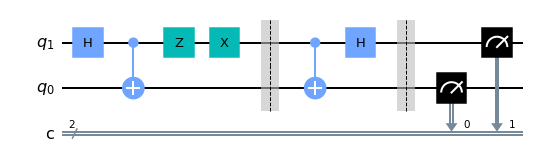

11 --> {'11': 100}


In [1]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_pairs = ['00','01','10','11']

#
# your code is here
#
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_pairs = ['00','01','10','11']

for pair in all_pairs:

    # create a quantum curcuit with two qubits: Asja's and Balvis' qubits.
    # both are initially set to |0>.
    q = QuantumRegister(2,"q") # quantum register with 2 qubits
    c = ClassicalRegister(2,"c") # classical register with 2 bits
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])

    # apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])

    # they are separated from each other now

    # if a is 1, then apply z-gate to Asja's qubit
    if pair[0]=='1': 
        qc.z(q[1])
    
    # if b is 1, then apply x-gate (NOT) to Asja's qubit
    if pair[1]=='1': 
        qc.x(q[1])
    
    # Asja sends her qubit to Balvis
    qc.barrier()
    
    #  apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])
    
    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])
    
    # measure both qubits
    qc.barrier()
    qc.measure(q,c)
    
    # draw the circuit in Qiskit's reading order
    display(qc.draw(output='mpl',reverse_bits=True))
    
    # compare the results with pair (a,b)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(pair,"-->",counts)

<h3> Task 2 </h3>

Verify each case by tracing the state vector (on paper). 

_Hint: Representing quantum states as the linear combinations of basis states makes calculation easier._

<h3> Task 3</h3>

Can the above set-up be used by Balvis?

Verify that the following modified protocol allows Balvis to send two classical bits by sending only his qubit.

For each pair of $ (a,b) \in \left\{ (0,0), (0,1), (1,0),(1,1) \right\} $:
- Create a quantum curcuit with two qubits: Asja's and Balvis' qubits
- Both are initially set to $ \ket{0} $
- Apply h-gate (Hadamard) to Asja's qubit
- Apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)

Assume that both qubits are separated from each other.

<ul>
    <li> If $ a $ is 1, then apply z-gate to Balvis' qubit. </li>
    <li> If $ b $ is 1, then apply x-gate (NOT) to Balvis' qubit. </li>
</ul>

Assume that Balvis sends his qubit to Asja.
- Apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
- Apply h-gate (Hadamard) to Asja's qubit
- Measure both qubits and compare the results with pair $ (a,b) $

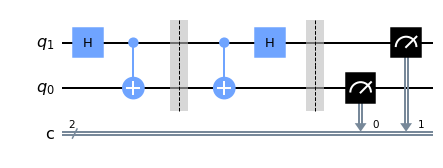

00 --> {'00': 100}


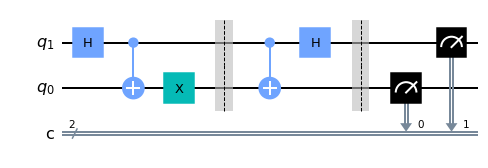

01 --> {'01': 100}


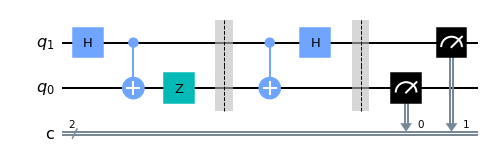

10 --> {'10': 100}


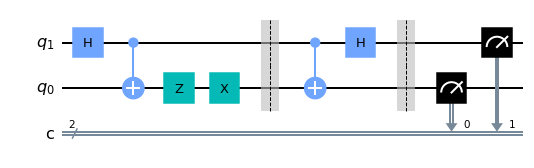

11 --> {'11': 100}


In [2]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_pairs = ['00','01','10','11']

#
# your code is here
#
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_pairs = ['00','01','10','11']

for pair in all_pairs:

    # create a quantum curcuit with two qubits: Asja's and Balvis' qubits.
    # both are initially set to |0>.
    q = QuantumRegister(2,"q") # quantum register with 2 qubits
    c = ClassicalRegister(2,"c") # classical register with 2 bits
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])

    # apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])

    # they are separated from each other now

    # if a is 1, then apply z-gate to Balvis' qubit
    if pair[0]=='1': 
        qc.z(q[0])
    
    # if b is 1, then apply x-gate (NOT) to Balvis' qubit
    if pair[1]=='1': 
        qc.x(q[0])
    
    # Balvis sends his qubit to Asja
    qc.barrier()
    
    #  apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])
    
    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])
    
    # measure both qubits
    qc.barrier()
    qc.measure(q,c)
    
    # draw the circuit in Qiskit's reading order
    display(qc.draw(output='mpl',reverse_bits=True))
    
    # compare the results with pair (a,b)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(pair,"-->",counts)

<h3> Task 4 </h3>

Verify each case by tracing the state vector (on paper). 

_Hint: Representing quantum states as the linear combinations of basis states makes calculation easier._